# Visualizing Michigan Data

Will Geary

wcg2111@columbia.edu

In [1]:
import pandas as pd
import numpy as np

# Load the Data

Here is the raw input data.

In [70]:
raw_data = pd.read_csv('data/05012013.csv')
raw_data.head()

Device     Trip  Latitude  Longitude  Speed   Heading  \
0    1026  1864523  42.25979  -83.73022   4.80  267.2375   
1    1026  1864523  42.25979  -83.73023   4.96  268.8500   
2    1026  1864523  42.25979  -83.73024   4.92  267.0875   
3    1026  1864523  42.25979  -83.73032   5.46  268.1375   
4    1026  1864523  42.25979  -83.73032   5.16  266.7375   

                 LocalTime  
0  2013-05-01 09:16:38.000  
1  2013-05-01 09:16:38.000  
2  2013-05-01 09:16:38.000  
3  2013-05-01 09:30:05.000  
4  2013-05-01 09:30:05.000

In [71]:
print len(np.unique(raw_data['Device'])), "Unique Device ID's in input dataset:"
print list(np.unique(raw_data['Device']))

36 Unique Device ID's in input dataset:
[1026, 1063, 1065, 1105, 1114, 1115, 1118, 1120, 1121, 1122, 1123, 1125, 1132, 1133, 1136, 1137, 1140, 1150, 1556, 1564, 1571, 1575, 1576, 1577, 1579, 1580, 1582, 1586, 1589, 1591, 1592, 1593, 1594, 1596, 1597, 1599]


# Map the Data

In [133]:
import folium
import palettable
#from geojson import Feature, Point, LineString, FeatureCollection
#import utm # Bidirectional UTM-WGS84 converter
#import matplotlib as mpl
%matplotlib inline

Define the color palette.

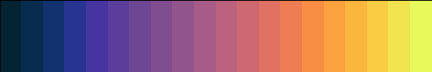

In [157]:
color_palette = palettable.cmocean.sequential.Thermal_20
color_palette.show_discrete_image()
color_palette = color_palette.colors

## Some other options that I tried:
#color_palette = palettable.colorbrewer.qualitative.Paired_12
#color_palette = palettable.mycarta.Cube1_20
#color_palette = palettable.tableau.Tableau_20
#color_palette = palettable.cmocean.sequential.Deep_20
#color_palette = palettable.cmocean.sequential.Haline_20
#color_palette = palettable.cmocean.sequential.Phase_20

Some helper functions for deaing with color from: http://www.psychocodes.in/rgb-to-hex-conversion-and-hex-to-rgb-conversion-in-python.html

In [158]:
def rgb2hex(r,g,b):
    hex = "#{:02x}{:02x}{:02x}".format(r,g,b)
    return hex

def hex2rgb(hexcode):
    rgb = tuple(map(ord,hexcode[1:].decode('hex')))
    return rgb

In [276]:
def map_all_devices(input_df, markers=True, zoom=8, colors = color_palette * 3, skip_devices=[], filename="output.html"):
    
    df = input_df.copy()
    
    # Drop nonsensical rows
    df = df[~((df['Latitude'] == 90) & (df['Longitude'] == 180))]
    df = df[~((df['Latitude'] == 0) & (df['Longitude'] == 0))]
    
    # Mapbox basemap
    baseurl = 'http://{s}.tiles.mapbox.com/v4/mapbox.light/{z}/{x}/{y}.png'
    api_key = 'pk.eyJ1Ijoid2lsbGdlYXJ5IiwiYSI6ImNpdW9wcmkxNjAxbDUydXQ0MzFwdmdvOWkifQ.9YIdQhYTOpRpocyFK-tBNA'
    token = '?access_token={}'.format(api_key)

    # Initialize map
    my_map = folium.Map(
        location=[
            np.mean(df['Latitude']), 
            np.mean(df['Longitude'])],
        tiles = baseurl+token,
        attr='Mapbox',
        zoom_start=zoom)
    
    unique_devices = np.unique(df['Device'])
    number_of_unique_devices = len(unique_devices)
    count = 0
    
    # For every trip taken by every device...
    # Create a polyline and add it to the map
    for device_id in list(unique_devices):
        
        if device_id not in skip_devices:
            data = df[df['Device'] == device_id]
            
            for trip_id in list(np.unique(data['Trip'])):
                trip = data[data['Trip'] == trip_id]
                lats = [i for i in trip['Latitude']]
                lons = [i for i in trip['Longitude']]
                coordinates = zip(lats, lons)
                
                #take every 10th coordinate
                coordinates = coordinates[::10]

                my_PolyLine=folium.PolyLine(
                    locations=coordinates,
                    weight=4,
                    color=rgb2hex(*colors[count]),
                    opacity=0.8)
                my_map.add_child(my_PolyLine)

                if markers == True:
                    my_marker = folium.Marker(location=[lats[0], lons[0]], popup='Device ID: {}'.format(device_id))#.add_to(map_4)
                    my_map.add_child(my_marker)
                else:
                    pass
            count += 1
        else:
            pass
    
    my_map.save(filename)
    return my_map

Raw data:

In [279]:
map_all_devices(raw_data, zoom=7, markers=False, filename="maps/raw_data.html")

In [243]:
# Custom Mapbox basemap
baseurl = 'http://{s}.tiles.mapbox.com/v4/mapbox.outdoors/{z}/{x}/{y}.png'
api_key = 'pk.eyJ1Ijoid2lsbGdlYXJ5IiwiYSI6ImNpdW9wcmkxNjAxbDUydXQ0MzFwdmdvOWkifQ.9YIdQhYTOpRpocyFK-tBNA'
token = '?access_token={}'.format(api_key)

folium.Map(
        location=[40.5, -73.5],
        tiles=baseurl+token,
        attr='Mapbox Attribution',
        zoom_start=8)

# Example Output Data

Here is an example of what we want the data to look like in order to animate it with Processing:

In [5]:
example = pd.read_csv("data/example.csv")
del example['Unnamed: 0']
example.head()

type_id            starttime             stoptime  tripduration  start_lat  \
0        1  2017-04-14 03:21:00  2017-04-14 03:23:00           120  45.516502   
1        1  2017-04-14 03:23:00  2017-04-14 03:25:00           120  45.520723   
2        1  2017-04-14 03:24:00  2017-04-14 03:26:00           120  45.505058   
3        1  2017-04-14 03:25:00  2017-04-14 03:27:00           120  45.522065   
4        1  2017-04-14 03:26:00  2017-04-14 03:28:00           120  45.500249   

    start_lon    end_lat     end_lon  
0 -122.461119  45.520723 -122.471093  
1 -122.471093  45.522065 -122.478074  
2 -122.841872  45.500249 -122.832785  
3 -122.478074  45.522140 -122.487140  
4 -122.832785  45.495102 -122.821238

# Work on Device 1026 first

In [229]:
df_user = raw_data[raw_data['Device'] == 1026]
df_user = df_user.rename(columns={"Device": "type_id", "Trip": "trip_id", "Latitude": "start_lat", "Longitude": "start_lon", "LocalTime": "starttime"})

In [230]:
trips = []
for i in np.unique(df_user['trip_id']):
    df = df_user.copy()
    df = df[df['trip_id'] == i]
    df['starttime'] = pd.to_datetime(df['starttime'])
    df['stoptime'] = df['starttime'].shift(-1).fillna(method='ffill')
    df['tripduration'] = df['stoptime'] - df['starttime']
    df['tripduration'] = df['tripduration'] / np.timedelta64(1, 's')
    #df = df[df['tripduration'] != 0]
    #df = df[df['tripduration'] <= 2.0]
    df['end_lat'] = df['start_lat'].shift(-1).fillna(method='ffill')
    df['end_lon'] = df['start_lon'].shift(-1).fillna(method='ffill')
    
    trips.append(df)

In [231]:
trips_df = pd.concat(trips)

In [232]:
#trips_df = trips_df[trips_df['tripduration'] != 0]
#trips_df = trips_df[trips_df['tripduration'] <= 2.0]
#trips_df = trips_df[trips_df['start_lat'] != 180]

In [233]:
trips_df.to_csv("data/user_1026.csv")

In [212]:
np.unique(trips_df['end_lat'])

array([ 42.25947,  42.25948,  42.2595 ,  42.25953,  42.25954,  42.25956,
        42.25959,  42.2596 ,  42.25963,  42.25964,  42.25965,  42.25966,
        42.25967,  42.25968,  42.2597 ,  42.25971,  42.25972,  42.25973,
        42.25974,  42.25975,  42.25976,  42.25977,  42.25978,  42.25979,
        42.2598 ,  42.25981,  42.25982,  42.25983,  42.25985,  42.25988,
        42.25989,  42.25993,  42.25994,  42.25997,  42.25998,  42.26   ,
        42.26001,  42.26002,  42.26003,  42.26004,  42.26005,  42.26006,
        42.26007,  42.26008,  42.26009,  42.2601 ,  42.26011,  42.26012,
        42.26014,  42.26015,  42.26016,  42.26017,  42.26019,  42.2602 ,
        42.26021,  42.26023,  42.26024,  42.26026,  42.26027,  42.26028,
        42.26029,  42.2603 ,  42.26031,  42.26032,  42.26033,  42.26034,
        42.26035,  42.26036,  42.26038,  42.26039,  42.2604 ,  42.26041,
        42.26042,  42.26044,  42.26045,  42.26046,  42.26048,  42.26049,
        42.2605 ,  42.26051,  42.26052,  42.26053, 

In [207]:
trips_df

type_id  trip_id  start_lat  start_lon  Speed   Heading  \
12        1026  1864523   42.25979  -83.73038   5.40  265.8500   
13        1026  1864523   42.25978  -83.73038   5.54  265.6875   
22        1026  1864523   42.25978  -83.73051   6.20  268.5125   
32        1026  1864523   42.25978  -83.73058   6.80  267.8500   
42        1026  1864523   42.25978  -83.73067   6.64  269.7250   
52        1026  1864523   42.25977  -83.73075   7.00  268.6625   
60        1026  1864523   42.25977  -83.73093   7.44  265.5625   
70        1026  1864523   42.25976  -83.73103   7.36  269.3125   
80        1026  1864523   42.25975  -83.73112   7.92  267.4000   
90        1026  1864523   42.25975  -83.73122   8.16  268.1625   
100       1026  1864523   42.25976  -83.73131   6.96  266.9375   
110       1026  1864523   42.25976  -83.73138   4.46  267.5875   
120       1026  1864523   42.25976  -83.73142   4.62  267.3750   
130       1026  1864523   42.25975  -83.73146   3.90  267.1500   
140       1026  1864523   42.25975  -83.73152   4.48  268.1125   
150       1026  1864523   42.25974  -83.73158   4.84  265.0375   
160       1026  1864523   42.25974  -83.73164   4.80  266.1500   
170       1026  1864523   42.25973  -83.73170   5.16  263.9500   
180       1026  1864523   42.25973  -83.73176   5.34  265.9500   
190       1026  1864523   42.25973  -83.73183   5.44  267.2750   
200       1026  1864523   42.25972  -83.73190   5.92  266.9500   
210       1026  1864523   42.25972  -83.73197   6.24  268.1375   
220       1026  1864523   42.25972  -83.73206   6.62  268.2875   
230       1026  1864523   42.25973  -83.73215   7.00  268.5875   
240       1026  1864523   42.25973  -83.73224   7.34  269.5000   
250       1026  1864523   42.25973  -83.73233   7.62  269.2250   
260       1026  1864523   42.25973  -83.73243   7.84  268.7000   
270       1026  1864523   42.25972  -83.73253   7.86  268.6000   
280       1026  1864523   42.25972  -83.73262   7.22  269.0500   
290       1026  1864523   42.25972  -83.73270   5.58  267.9500   
...        ...      ...        ...        ...    ...       ...   
26523     1026  1864528   42.25983  -83.72978   6.44  271.3125   
26533     1026  1864528   42.25983  -83.72984   3.86  264.9875   
26543     1026  1864528   42.25982  -83.72989   3.78  254.1000   
26553     1026  1864528   42.25980  -83.72992   3.48  234.7000   
26563     1026  1864528   42.25977  -83.72993   3.04  207.9375   
26573     1026  1864528   42.25974  -83.72994   2.96  189.4875   
26583     1026  1864528   42.25971  -83.72994   3.16  181.6000   
26593     1026  1864528   42.25968  -83.72994   3.14  178.4500   
26603     1026  1864528   42.25965  -83.72994   2.50  182.4625   
26613     1026  1864528   42.25964  -83.72994   1.22  181.8250   
26623     1026  1864528   42.25964  -83.72994   0.12  181.1500   
26633     1026  1864528   42.25963  -83.72994   0.02  181.1500   
26643     1026  1864528   42.25963  -83.72994   0.02  181.1500   
26653     1026  1864528   42.25963  -83.72995   0.00  181.1500   
26663     1026  1864528   42.25963  -83.72995   0.00  181.1500   
26673     1026  1864528   42.25963  -83.72995   0.00  181.1500   
26683     1026  1864528   42.25963  -83.72995   0.02  181.1500   
26693     1026  1864528   42.25963  -83.72995   0.00  181.1500   
26703     1026  1864528   42.25963  -83.72995   0.00  181.1500   
26713     1026  1864528   42.25963  -83.72995   0.00  181.1500   
26723     1026  1864528   42.25963  -83.72995   0.00  181.1500   
26733     1026  1864528   42.25963  -83.72994   0.02  181.1500   
26743     1026  1864528   42.25963  -83.72994   0.00  181.1500   
26753     1026  1864528   42.25963  -83.72994   0.00  181.1500   
26763     1026  1864528   42.25963  -83.72994   0.00  181.1500   
26773     1026  1864528   42.25963  -83.72994   0.02  181.1500   
26783     1026  1864528   42.25963  -83.72994   0.02  181.1500   
26793     1026  1864528   42.25963  -83.72994   0.02  181.1500   
26803     1026  1864528   42.25963  -83.72993  

In [157]:
df

type_id  trip_id  start_lat  start_lon  Speed   Heading  \
12        1026  1864523   42.25979  -83.73038   5.40  265.8500   
13        1026  1864523   42.25978  -83.73038   5.54  265.6875   
22        1026  1864523   42.25978  -83.73051   6.20  268.5125   
32        1026  1864523   42.25978  -83.73058   6.80  267.8500   
42        1026  1864523   42.25978  -83.73067   6.64  269.7250   
52        1026  1864523   42.25977  -83.73075   7.00  268.6625   
60        1026  1864523   42.25977  -83.73093   7.44  265.5625   
70        1026  1864523   42.25976  -83.73103   7.36  269.3125   
80        1026  1864523   42.25975  -83.73112   7.92  267.4000   
90        1026  1864523   42.25975  -83.73122   8.16  268.1625   
100       1026  1864523   42.25976  -83.73131   6.96  266.9375   
110       1026  1864523   42.25976  -83.73138   4.46  267.5875   
120       1026  1864523   42.25976  -83.73142   4.62  267.3750   
130       1026  1864523   42.25975  -83.73146   3.90  267.1500   
140       1026  1864523   42.25975  -83.73152   4.48  268.1125   
150       1026  1864523   42.25974  -83.73158   4.84  265.0375   
160       1026  1864523   42.25974  -83.73164   4.80  266.1500   
170       1026  1864523   42.25973  -83.73170   5.16  263.9500   
180       1026  1864523   42.25973  -83.73176   5.34  265.9500   
190       1026  1864523   42.25973  -83.73183   5.44  267.2750   
200       1026  1864523   42.25972  -83.73190   5.92  266.9500   
210       1026  1864523   42.25972  -83.73197   6.24  268.1375   
220       1026  1864523   42.25972  -83.73206   6.62  268.2875   
230       1026  1864523   42.25973  -83.73215   7.00  268.5875   
240       1026  1864523   42.25973  -83.73224   7.34  269.5000   
250       1026  1864523   42.25973  -83.73233   7.62  269.2250   
260       1026  1864523   42.25973  -83.73243   7.84  268.7000   
270       1026  1864523   42.25972  -83.73253   7.86  268.6000   
280       1026  1864523   42.25972  -83.73262   7.22  269.0500   
290       1026  1864523   42.25972  -83.73270   5.58  267.9500   
...        ...      ...        ...        ...    ...       ...   
10871     1026  1864523   42.26027  -83.73796   0.02  174.8375   
10881     1026  1864523   42.26027  -83.73796   0.00  174.8375   
10891     1026  1864523   42.26027  -83.73796   0.00  174.8375   
10901     1026  1864523   42.26027  -83.73796   0.00  174.8375   
10911     1026  1864523   42.26026  -83.73796   0.00  174.8375   
10921     1026  1864523   42.26026  -83.73796   0.00  174.8375   
10931     1026  1864523   42.26026  -83.73796   0.00  174.8375   
10941     1026  1864523   42.26026  -83.73796   0.00  174.8375   
10951     1026  1864523   42.26026  -83.73796   0.00  174.8375   
10961     1026  1864523   42.26026  -83.73796   0.00  174.8375   
10971     1026  1864523   42.26026  -83.73796   0.00  174.8375   
10981     1026  1864523   42.26026  -83.73796   0.00  174.8375   
10991     1026  1864523   42.26026  -83.73797   0.02  174.8375   
11001     1026  1864523   42.26026  -83.73797   0.00  174.8375   
11011     1026  1864523   42.26026  -83.73797   0.00  174.8375   
11021     1026  1864523   42.26026  -83.73797   0.00  174.8375   
11031     1026  1864523   42.26026  -83.73797   0.00  174.8375   
11041     1026  1864523   42.26027  -83.73797   0.00  174.8375   
11051     1026  1864523   42.26027  -83.73797   0.02  174.8375   
11061     1026  1864523   42.26027  -83.73797   0.02  174.8375   
11071     1026  1864523   42.26027  -83.73797   0.00  174.8375   
11081     1026  1864523   42.26027  -83.73797   0.00  174.8375   
11091     1026  1864523   42.26027  -83.73797   0.02  174.8375   
11101     1026  1864523   42.26027  -83.73797   0.00  174.8375   
11111     1026  1864523   42.26027  -83.73797   0.00  174.8375   
11121     1026  1864523   42.26026  -83.73797   0.00  174.8375   
11131     1026  1864523   42.26026  -83.73797   0.00  174.8375   
11141     1026  1864523   42.26026  -83.73797   0.00  174.8375   
11151     1026  1864523   42.26026  -83.73797  

In [213]:
df = df_user[df_user['trip_id'] == 1864523].copy()

In [214]:
df['starttime'] = pd.to_datetime(df['starttime'])
df['stoptime'] = df['starttime'].shift(-1).fillna(method='ffill')
df['tripduration'] = df['stoptime'] - df['starttime']
df['tripduration'] = df['tripduration'] / np.timedelta64(1, 's')
df['end_lat'] = df['start_lat'].shift(-1).fillna(method='ffill')
df['end_lon'] = df['start_lon'].shift(-1).fillna(method='ffill')

In [215]:
# Drop rows where tripduration == 0 or tripduraton > 2.0
df = df[df['tripduration'] != 0]
df = df[df['tripduration'] <= 2.0]

In [216]:
df.to_csv("data/user_1026.csv")

In [163]:
df

type_id  trip_id  start_lat  start_lon  Speed   Heading  \
12        1026  1864523   42.25979  -83.73038   5.40  265.8500   
13        1026  1864523   42.25978  -83.73038   5.54  265.6875   
22        1026  1864523   42.25978  -83.73051   6.20  268.5125   
32        1026  1864523   42.25978  -83.73058   6.80  267.8500   
42        1026  1864523   42.25978  -83.73067   6.64  269.7250   
52        1026  1864523   42.25977  -83.73075   7.00  268.6625   
60        1026  1864523   42.25977  -83.73093   7.44  265.5625   
70        1026  1864523   42.25976  -83.73103   7.36  269.3125   
80        1026  1864523   42.25975  -83.73112   7.92  267.4000   
90        1026  1864523   42.25975  -83.73122   8.16  268.1625   
100       1026  1864523   42.25976  -83.73131   6.96  266.9375   
110       1026  1864523   42.25976  -83.73138   4.46  267.5875   
120       1026  1864523   42.25976  -83.73142   4.62  267.3750   
130       1026  1864523   42.25975  -83.73146   3.90  267.1500   
140       1026  1864523   42.25975  -83.73152   4.48  268.1125   
150       1026  1864523   42.25974  -83.73158   4.84  265.0375   
160       1026  1864523   42.25974  -83.73164   4.80  266.1500   
170       1026  1864523   42.25973  -83.73170   5.16  263.9500   
180       1026  1864523   42.25973  -83.73176   5.34  265.9500   
190       1026  1864523   42.25973  -83.73183   5.44  267.2750   
200       1026  1864523   42.25972  -83.73190   5.92  266.9500   
210       1026  1864523   42.25972  -83.73197   6.24  268.1375   
220       1026  1864523   42.25972  -83.73206   6.62  268.2875   
230       1026  1864523   42.25973  -83.73215   7.00  268.5875   
240       1026  1864523   42.25973  -83.73224   7.34  269.5000   
250       1026  1864523   42.25973  -83.73233   7.62  269.2250   
260       1026  1864523   42.25973  -83.73243   7.84  268.7000   
270       1026  1864523   42.25972  -83.73253   7.86  268.6000   
280       1026  1864523   42.25972  -83.73262   7.22  269.0500   
290       1026  1864523   42.25972  -83.73270   5.58  267.9500   
...        ...      ...        ...        ...    ...       ...   
10871     1026  1864523   42.26027  -83.73796   0.02  174.8375   
10881     1026  1864523   42.26027  -83.73796   0.00  174.8375   
10891     1026  1864523   42.26027  -83.73796   0.00  174.8375   
10901     1026  1864523   42.26027  -83.73796   0.00  174.8375   
10911     1026  1864523   42.26026  -83.73796   0.00  174.8375   
10921     1026  1864523   42.26026  -83.73796   0.00  174.8375   
10931     1026  1864523   42.26026  -83.73796   0.00  174.8375   
10941     1026  1864523   42.26026  -83.73796   0.00  174.8375   
10951     1026  1864523   42.26026  -83.73796   0.00  174.8375   
10961     1026  1864523   42.26026  -83.73796   0.00  174.8375   
10971     1026  1864523   42.26026  -83.73796   0.00  174.8375   
10981     1026  1864523   42.26026  -83.73796   0.00  174.8375   
10991     1026  1864523   42.26026  -83.73797   0.02  174.8375   
11001     1026  1864523   42.26026  -83.73797   0.00  174.8375   
11011     1026  1864523   42.26026  -83.73797   0.00  174.8375   
11021     1026  1864523   42.26026  -83.73797   0.00  174.8375   
11031     1026  1864523   42.26026  -83.73797   0.00  174.8375   
11041     1026  1864523   42.26027  -83.73797   0.00  174.8375   
11051     1026  1864523   42.26027  -83.73797   0.02  174.8375   
11061     1026  1864523   42.26027  -83.73797   0.02  174.8375   
11071     1026  1864523   42.26027  -83.73797   0.00  174.8375   
11081     1026  1864523   42.26027  -83.73797   0.00  174.8375   
11091     1026  1864523   42.26027  -83.73797   0.02  174.8375   
11101     1026  1864523   42.26027  -83.73797   0.00  174.8375   
11111     1026  1864523   42.26027  -83.73797   0.00  174.8375   
11121     1026  1864523   42.26026  -83.73797   0.00  174.8375   
11131     1026  1864523   42.26026  -83.73797   0.00  174.8375   
11141     1026  1864523   42.26026  -83.73797   0.00  174.8375   
11151     1026  1864523   42.26026  -83.73797  

# Transform the Input Data

In [36]:
df = pd.DataFrame()

Create `typeid` column.

In [31]:
df['type_id'] = raw_data['Device']
df['trip_id'] = raw_data['Trip']

Create `starttime` column.

In [32]:
df['starttime'] = raw_data['LocalTime']
df['starttime'] = pd.to_datetime(df['starttime'])

In [35]:
df[df['type_id'] == 1026][df['trip_id'] == 1864528]

/Users/Will/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


type_id  trip_id           starttime
13754     1026  1864528 2013-05-01 20:51:42
13755     1026  1864528 2013-05-01 20:51:42
13756     1026  1864528 2013-05-01 21:05:10
13757     1026  1864528 2013-05-01 21:05:10
13758     1026  1864528 2013-05-01 21:05:10
13759     1026  1864528 2013-05-01 21:05:10
13760     1026  1864528 2013-05-01 21:05:10
13761     1026  1864528 2013-05-01 21:05:10
13762     1026  1864528 2013-05-01 21:05:10
13763     1026  1864528 2013-05-01 21:05:10
13764     1026  1864528 2013-05-01 21:05:10
13765     1026  1864528 2013-05-01 21:05:10
13766     1026  1864528 2013-05-01 21:05:11
13767     1026  1864528 2013-05-01 21:05:11
13768     1026  1864528 2013-05-01 21:05:11
13769     1026  1864528 2013-05-01 21:05:11
13770     1026  1864528 2013-05-01 21:05:11
13771     1026  1864528 2013-05-01 21:05:11
13772     1026  1864528 2013-05-01 21:05:11
13773     1026  1864528 2013-05-01 21:05:11
13774     1026  1864528 2013-05-01 21:05:11
13775     1026  1864528 2013-05-01 21:05:11
13776     1026  1864528 2013-05-01 21:05:12
13777     1026  1864528 2013-05-01 21:05:12
13778     1026  1864528 2013-05-01 21:05:12
13779     1026  1864528 2013-05-01 21:05:12
13780     1026  1864528 2013-05-01 21:05:12
13781     1026  1864528 2013-05-01 21:05:12
13782     1026  1864528 2013-05-01 21:05:12
13783     1026  1864528 2013-05-01 21:05:12
...        ...      ...                 ...
26792     1026  1864528 2013-05-01 21:26:55
26793     1026  1864528 2013-05-01 21:26:55
26794     1026  1864528 2013-05-01 21:26:56
26795     1026  1864528 2013-05-01 21:26:56
26796     1026  1864528 2013-05-01 21:26:56
26797     1026  1864528 2013-05-01 21:26:56
26798     1026  1864528 2013-05-01 21:26:56
26799     1026  1864528 2013-05-01 21:26:56
26800     1026  1864528 2013-05-01 21:26:56
26801     1026  1864528 2013-05-01 21:26:56
26802     1026  1864528 2013-05-01 21:26:56
26803     1026  1864528 2013-05-01 21:26:56
26804     1026  1864528 2013-05-01 21:26:57
26805     1026  1864528 2013-05-01 21:26:57
26806     1026  1864528 2013-05-01 21:26:57
26807     1026  1864528 2013-05-01 21:26:57
26808     1026  1864528 2013-05-01 21:26:57
26809     1026  1864528 2013-05-01 21:26:57
26810     1026  1864528 2013-05-01 21:26:57
26811     1026  1864528 2013-05-01 21:26:57
26812     1026  1864528 2013-05-01 21:26:57
26813     1026  1864528 2013-05-01 21:26:57
26814     1026  1864528 2013-05-01 21:26:58
26815     1026  1864528 2013-05-01 21:26:58
26816     1026  1864528 2013-05-01 21:26:58
26817     1026  1864528 2013-05-01 21:26:58
26818     1026  1864528 2013-05-01 21:26:58
26819     1026  1864528 2013-05-01 21:26:58
26820     1026  1864528 2013-05-01 21:26:58
26821     1026  1864528 2013-05-01 21:26:58

[13068 rows x 3 columns]

Create `stoptime` column.

In [23]:
df['stoptime'] = raw_data['LocalTime'].shift(-1).fillna(method='ffill')
df['stoptime'] = pd.to_datetime(df['stoptime'])

Create `tripduration` column.

In [24]:
df['tripduration'] = df['stoptime'] - df['starttime']
df['tripduration'] = df['tripduration'] / np.timedelta64(1, 's')

Create `start_lat` column.

In [25]:
df['start_lat'] = raw_data['Latitude']

Create `start_lon` column.

In [26]:
df['start_lon'] = raw_data['Longitude']

type_id  trip_id           starttime            stoptime  tripduration  \
0         1026  1864523 2013-05-01 09:16:38 2013-05-01 09:16:38           0.0   
1         1026  1864523 2013-05-01 09:16:38 2013-05-01 09:16:38           0.0   
2         1026  1864523 2013-05-01 09:16:38 2013-05-01 09:30:05         807.0   
3         1026  1864523 2013-05-01 09:30:05 2013-05-01 09:30:05           0.0   
4         1026  1864523 2013-05-01 09:30:05 2013-05-01 09:30:05           0.0   
5         1026  1864523 2013-05-01 09:30:05 2013-05-01 09:30:05           0.0   
6         1026  1864523 2013-05-01 09:30:05 2013-05-01 09:30:05           0.0   
7         1026  1864523 2013-05-01 09:30:05 2013-05-01 09:30:05           0.0   
8         1026  1864523 2013-05-01 09:30:05 2013-05-01 09:30:05           0.0   
9         1026  1864523 2013-05-01 09:30:05 2013-05-01 09:30:05           0.0   
10        1026  1864523 2013-05-01 09:30:05 2013-05-01 09:30:05           0.0   
11        1026  1864523 2013-05-01 09:30:05 2013-05-01 09:30:05           0.0   
12        1026  1864523 2013-05-01 09:30:05 2013-05-01 09:30:06           1.0   
13        1026  1864523 2013-05-01 09:30:06 2013-05-01 09:30:07           1.0   
14        1026  1864523 2013-05-01 09:30:07 2013-05-01 09:30:07           0.0   
15        1026  1864523 2013-05-01 09:30:07 2013-05-01 09:30:07           0.0   
16        1026  1864523 2013-05-01 09:30:07 2013-05-01 09:30:07           0.0   
17        1026  1864523 2013-05-01 09:30:07 2013-05-01 09:30:07           0.0   
18        1026  1864523 2013-05-01 09:30:07 2013-05-01 09:30:07           0.0   
19        1026  1864523 2013-05-01 09:30:07 2013-05-01 09:30:07           0.0   
20        1026  1864523 2013-05-01 09:30:07 2013-05-01 09:30:07           0.0   
21        1026  1864523 2013-05-01 09:30:07 2013-05-01 09:30:07           0.0   
22        1026  1864523 2013-05-01 09:30:07 2013-05-01 09:30:08           1.0   
23        1026  1864523 2013-05-01 09:30:08 2013-05-01 09:30:08           0.0   
24        1026  1864523 2013-05-01 09:30:08 2013-05-01 09:30:08           0.0   
25        1026  1864523 2013-05-01 09:30:08 2013-05-01 09:30:08           0.0   
26        1026  1864523 2013-05-01 09:30:08 2013-05-01 09:30:08           0.0   
27        1026  1864523 2013-05-01 09:30:08 2013-05-01 09:30:08           0.0   
28        1026  1864523 2013-05-01 09:30:08 2013-05-01 09:30:08           0.0   
29        1026  1864523 2013-05-01 09:30:08 2013-05-01 09:30:08           0.0   
...        ...      ...                 ...                 ...           ...   
26792     1026  1864528 2013-05-01 21:26:55 2013-05-01 21:26:55           0.0   
26793     1026  1864528 2013-05-01 21:26:55 2013-05-01 21:26:56           1.0   
26794     1026  1864528 2013-05-01 21:26:56 2013-05-01 21:26:56           0.0   
26795     1026  1864528 2013-05-01 21:26:56 2013-05-01 21:26:56           0.0   
26796     1026  1864528 2013-05-01 21:26:56 2013-05-01 21:26:56           0.0   
26797     1026  1864528 2013-05-01 21:26:56 2013-05-01 21:26:56           0.0   
26798     1026  1864528 2013-05-01 21:26:56 2013-05-01 21:26:56           0.0   
26799     1026  1864528 2013-05-01 21:26:56 2013-05-01 21:26:56           0.0   
26800     1026  1864528 2013-05-01 21:26:56 2013-05-01 21:26:56           0.0   
26801     1026  1864528 2013-05-01 21:26:56 2013-05-01 21:26:56           0.0   
26802     1026  1864528 2013-05-01 21:26:56 2013-05-01 21:26:56           0.0   
26803     1026  1864528 2013-05-01 21:26:56 2013-05-01 21:26:57           1.0   
26804     1026  1864528 2013-05-01 21:26:57 2013-05-01 21:26:57           0.0   
26805     1026  1864528 2013-05-01 21:26:57 2013-05-01 21:26:57           0.0   
26806     1026  1864528 2013-05-01 21:26:57 2013-05-01 21:26:57           0.0   
26807     1026  1864528 2013-05-01 21:26:57 2013-05-01 21:26:57           0.0   
26808     1026  1864528 2013-05-01 21:26:57 2013-05-01 21:26:57           0.0   
26809     1026  1864528 2013-05-01 21:

Create `end_lat` column.

In [12]:
df['end_lat'] = df['start_lat'].shift(-1).fillna(method='ffill')

Create end_lon column.

In [13]:
df['end_lon'] = df['start_lon'].shift(-1).fillna(method='ffill')

# Clean the Transformed Data

In [14]:
df.head()

type_id  trip_id           starttime            stoptime  tripduration  \
0     1026  1864523 2013-05-01 09:16:38 2013-05-01 09:16:38           0.0   
1     1026  1864523 2013-05-01 09:16:38 2013-05-01 09:16:38           0.0   
2     1026  1864523 2013-05-01 09:16:38 2013-05-01 09:30:05         807.0   
3     1026  1864523 2013-05-01 09:30:05 2013-05-01 09:30:05           0.0   
4     1026  1864523 2013-05-01 09:30:05 2013-05-01 09:30:05           0.0   

   start_lat  start_lon   end_lat   end_lon  
0   42.25979  -83.73022  42.25979 -83.73023  
1   42.25979  -83.73023  42.25979 -83.73024  
2   42.25979  -83.73024  42.25979 -83.73032  
3   42.25979  -83.73032  42.25979 -83.73032  
4   42.25979  -83.73032  42.25979 -83.73034

In [16]:
user_1026 = df[df['type_id'] == 1026]

In [17]:
user_1026

type_id  trip_id           starttime            stoptime  tripduration  \
0         1026  1864523 2013-05-01 09:16:38 2013-05-01 09:16:38           0.0   
1         1026  1864523 2013-05-01 09:16:38 2013-05-01 09:16:38           0.0   
2         1026  1864523 2013-05-01 09:16:38 2013-05-01 09:30:05         807.0   
3         1026  1864523 2013-05-01 09:30:05 2013-05-01 09:30:05           0.0   
4         1026  1864523 2013-05-01 09:30:05 2013-05-01 09:30:05           0.0   
5         1026  1864523 2013-05-01 09:30:05 2013-05-01 09:30:05           0.0   
6         1026  1864523 2013-05-01 09:30:05 2013-05-01 09:30:05           0.0   
7         1026  1864523 2013-05-01 09:30:05 2013-05-01 09:30:05           0.0   
8         1026  1864523 2013-05-01 09:30:05 2013-05-01 09:30:05           0.0   
9         1026  1864523 2013-05-01 09:30:05 2013-05-01 09:30:05           0.0   
10        1026  1864523 2013-05-01 09:30:05 2013-05-01 09:30:05           0.0   
11        1026  1864523 2013-05-01 09:30:05 2013-05-01 09:30:05           0.0   
12        1026  1864523 2013-05-01 09:30:05 2013-05-01 09:30:06           1.0   
13        1026  1864523 2013-05-01 09:30:06 2013-05-01 09:30:07           1.0   
14        1026  1864523 2013-05-01 09:30:07 2013-05-01 09:30:07           0.0   
15        1026  1864523 2013-05-01 09:30:07 2013-05-01 09:30:07           0.0   
16        1026  1864523 2013-05-01 09:30:07 2013-05-01 09:30:07           0.0   
17        1026  1864523 2013-05-01 09:30:07 2013-05-01 09:30:07           0.0   
18        1026  1864523 2013-05-01 09:30:07 2013-05-01 09:30:07           0.0   
19        1026  1864523 2013-05-01 09:30:07 2013-05-01 09:30:07           0.0   
20        1026  1864523 2013-05-01 09:30:07 2013-05-01 09:30:07           0.0   
21        1026  1864523 2013-05-01 09:30:07 2013-05-01 09:30:07           0.0   
22        1026  1864523 2013-05-01 09:30:07 2013-05-01 09:30:08           1.0   
23        1026  1864523 2013-05-01 09:30:08 2013-05-01 09:30:08           0.0   
24        1026  1864523 2013-05-01 09:30:08 2013-05-01 09:30:08           0.0   
25        1026  1864523 2013-05-01 09:30:08 2013-05-01 09:30:08           0.0   
26        1026  1864523 2013-05-01 09:30:08 2013-05-01 09:30:08           0.0   
27        1026  1864523 2013-05-01 09:30:08 2013-05-01 09:30:08           0.0   
28        1026  1864523 2013-05-01 09:30:08 2013-05-01 09:30:08           0.0   
29        1026  1864523 2013-05-01 09:30:08 2013-05-01 09:30:08           0.0   
...        ...      ...                 ...                 ...           ...   
26792     1026  1864528 2013-05-01 21:26:55 2013-05-01 21:26:55           0.0   
26793     1026  1864528 2013-05-01 21:26:55 2013-05-01 21:26:56           1.0   
26794     1026  1864528 2013-05-01 21:26:56 2013-05-01 21:26:56           0.0   
26795     1026  1864528 2013-05-01 21:26:56 2013-05-01 21:26:56           0.0   
26796     1026  1864528 2013-05-01 21:26:56 2013-05-01 21:26:56           0.0   
26797     1026  1864528 2013-05-01 21:26:56 2013-05-01 21:26:56           0.0   
26798     1026  1864528 2013-05-01 21:26:56 2013-05-01 21:26:56           0.0   
26799     1026  1864528 2013-05-01 21:26:56 2013-05-01 21:26:56           0.0   
26800     1026  1864528 2013-05-01 21:26:56 2013-05-01 21:26:56           0.0   
26801     1026  1864528 2013-05-01 21:26:56 2013-05-01 21:26:56           0.0   
26802     1026  1864528 2013-05-01 21:26:56 2013-05-01 21:26:56           0.0   
26803     1026  1864528 2013-05-01 21:26:56 2013-05-01 21:26:57           1.0   
26804     1026  1864528 2013-05-01 21:26:57 2013-05-01 21:26:57           0.0   
26805     1026  1864528 2013-05-01 21:26:57 2013-05-01 21:26:57           0.0   
26806     1026  1864528 2013-05-01 21:26:57 2013-05-01 21:26:57           0.0   
26807     1026  1864528 2013-05-01 21:26:57 2013-05-01 21:26:57           0.0   
26808     1026  1864528 2013-05-01 21:26:57 2013-05-01 21:26:57           0.0   
26809     1026  1864528 2013-05-01 21:

Drop duplicate rows.

In [ ]:
#df = df.drop_duplicates(['type_id', 'trip_id', 'starttime', 'stoptime'])

Drop rows with durations > 10.

In [ ]:
#df = df[df['tripduration'] < 10.0]

Save to csv.

In [ ]:
#df.to_csv('data/trips.csv')